# Olympian deities

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [23]:
from fastai.vision import *

np.random.seed(42)

## Load dataset

In [25]:
dataset = Path("dataset")
google_images = Path("google_images")

In [18]:
google_images.ls()

[PosixPath('google_images/poseidon.txt'),
 PosixPath('google_images/athena.txt'),
 PosixPath('google_images/hera.txt'),
 PosixPath('google_images/zeus.txt')]

In [19]:
dataset.ls()

[PosixPath('data/poseidon'),
 PosixPath('data/zeus'),
 PosixPath('data/athena'),
 PosixPath('data/hera')]

In [21]:
for urls, dest in zip(google_images.ls(), dataset.ls()):
    download_images(urls, dest)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [26]:
for dest in dataset.ls():
    verify_images(dest, delete=True, max_size=500)

## View data

In [27]:
data = ImageDataBunch.from_folder(
    dataset, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4
).normalize(imagenet_stats)

In [34]:
data.c, data.classes, len(data.train_ds), len(data.valid_ds)

(4, ['athena', 'hera', 'poseidon', 'zeus'], 1088, 272)

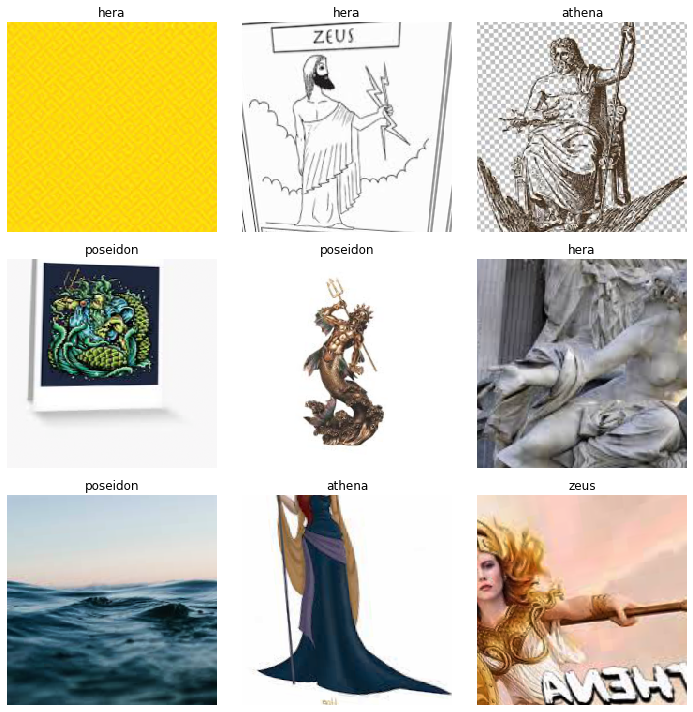

In [33]:
data.show_batch(rows=3, figsize=(10, 10))

## Training: Resnet34

In [61]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [62]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.081876,1.496494,0.536765,00:09
1,1.760763,1.477478,0.525735,00:08
2,1.557397,1.405636,0.503676,00:08
3,1.380024,1.374163,0.496324,00:08
4,1.223496,1.338277,0.488971,00:08


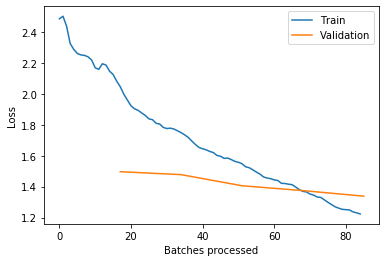

In [63]:
learn.recorder.plot_losses()

In [64]:
learn.save("stage-1")

In [55]:
learn.load("stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (1088 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
poseidon,poseidon,poseidon,poseidon,poseidon
Path: dataset;

Valid: LabelList (272 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
poseidon,hera,hera,zeus,hera
Path: dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

### Unfreezing

In [65]:
learn.unfreeze()

In [66]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


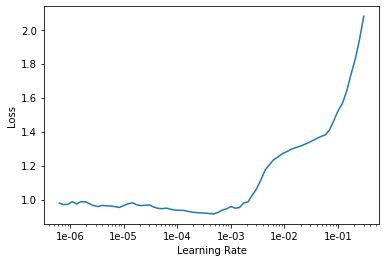

In [68]:
learn.recorder.plot()

In [69]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.916439,1.302716,0.485294,00:12
1,0.864621,1.286843,0.470588,00:12


In [70]:
learn.save("stage-2")

## Training: ResNet50

In [71]:
data = ImageDataBunch.from_folder(
    dataset, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4, bs=32
).normalize(imagenet_stats)

In [74]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


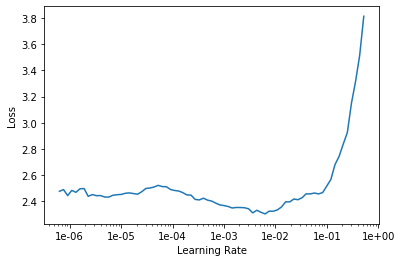

In [75]:
learn.lr_find()
learn.recorder.plot()

In [76]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.228268,1.673340,0.511029,00:20
1,1.940508,1.957797,0.544118,00:19
2,1.628304,1.424840,0.488971,00:19
3,1.340127,1.146965,0.408088,00:19
4,1.064277,1.138120,0.433824,00:19
5,0.897164,1.132800,0.426471,00:19
6,0.776726,1.050517,0.408088,00:19
7,0.700976,1.041349,0.411765,00:19


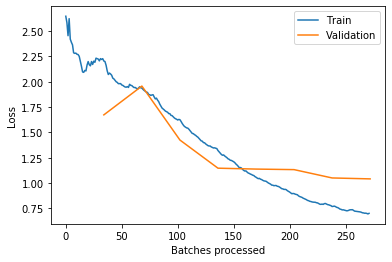

In [77]:
learn.recorder.plot_losses()

In [78]:
learn.save("stage-1-50")

## Interpretation

In [79]:
interp = ClassificationInterpretation.from_learner(learn)

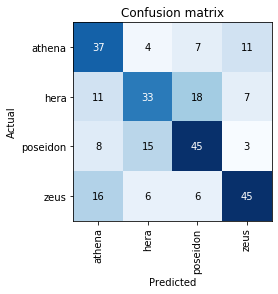

In [80]:
interp.plot_confusion_matrix()

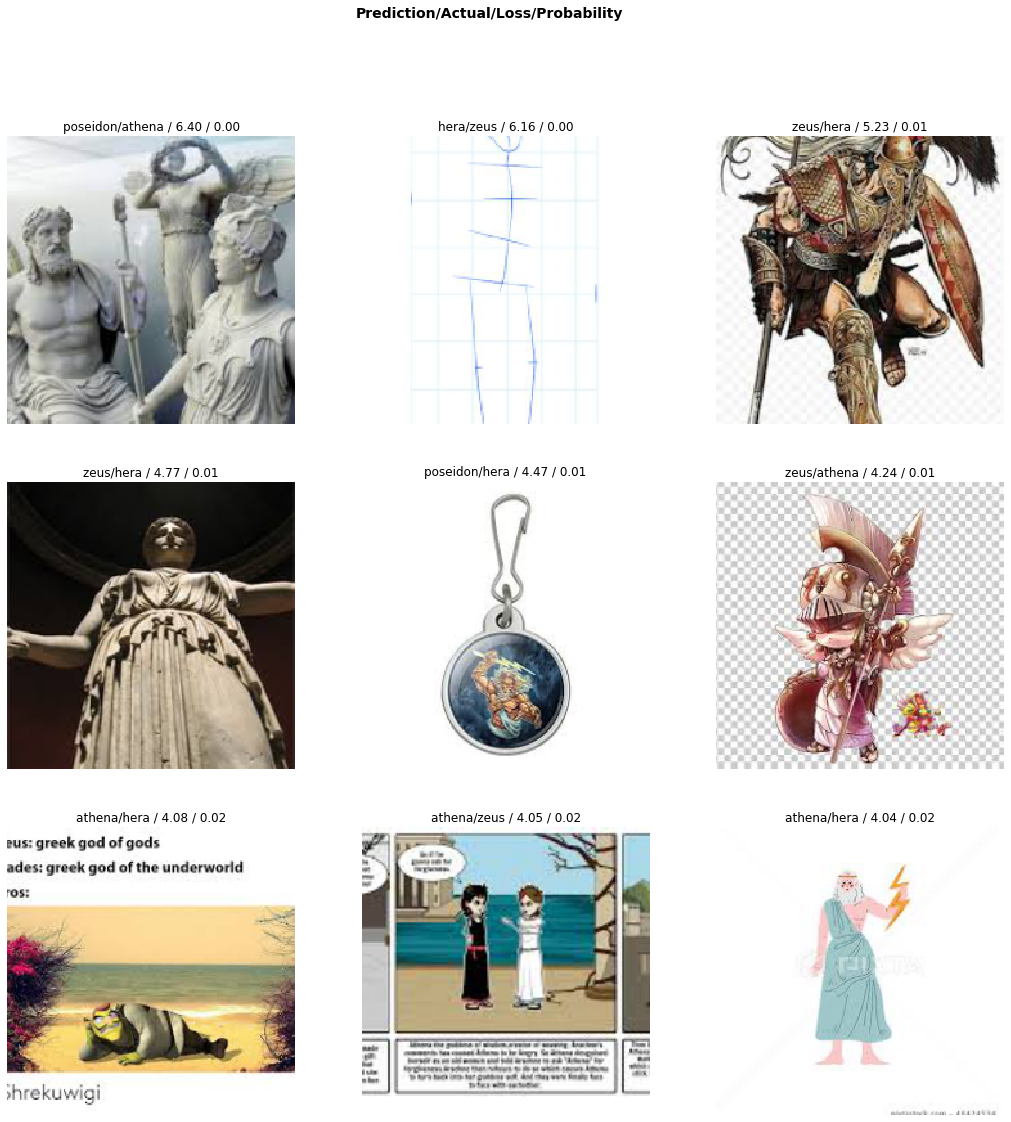

In [81]:
interp.plot_top_losses(9, figsize=(18, 18))